In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('events.csv')

In [6]:
df['Event'].value_counts()

Accurate Pass      64
Clearance          10
Interception        8
Inaccurate Pass     6
Tackle              4
Name: Event, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    92 non-null     object
 1   Player  92 non-null     object
 2   Event   92 non-null     object
 3   X       92 non-null     int64 
 4   Y       92 non-null     int64 
 5   X2      92 non-null     object
 6   Y2      92 non-null     object
dtypes: int64(2), object(5)
memory usage: 5.2+ KB


In [34]:
passes = df[(df['Event']=='Accurate Pass') | (df['Event']=='Inaccurate Pass')]

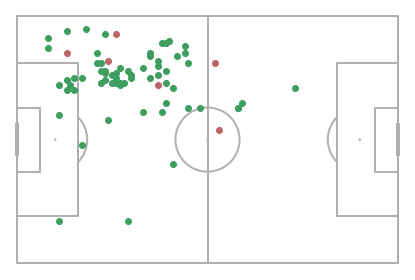

In [41]:
pitch = Pitch(pitch_type='wyscout')
fig,ax = pitch.draw()

pitch.scatter(passes[passes['Event']=='Accurate Pass']['X'],passes[passes['Event']=='Accurate Pass']['Y'],ax=ax,c='#3e9e5f')
pitch.scatter(passes[passes['Event']=='Inaccurate Pass']['X'],passes[passes['Event']=='Inaccurate Pass']['Y'],ax=ax,c='#bb6666')

plt.show()

In [62]:
passes['X2'] = pd.to_numeric(passes['X2'])
passes['Y2'] = pd.to_numeric(passes['Y2'])

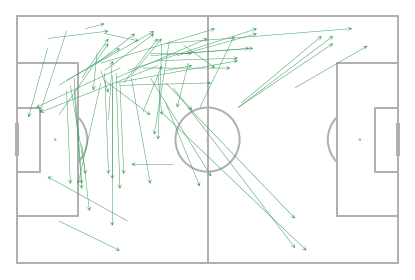

In [65]:
pitch = Pitch(pitch_type='wyscout')
fig,ax = pitch.draw()

pitch.arrows(passes[passes['Event']=='Accurate Pass']['X'], passes[passes['Event']=='Accurate Pass']['Y'],
    passes[passes['Event']=='Accurate Pass']['X2'], passes[passes['Event']=='Accurate Pass']['Y2'], ax=ax, color="#3e9e5f", width=.5,
             headwidth=10, headlength=10)

plt.show()

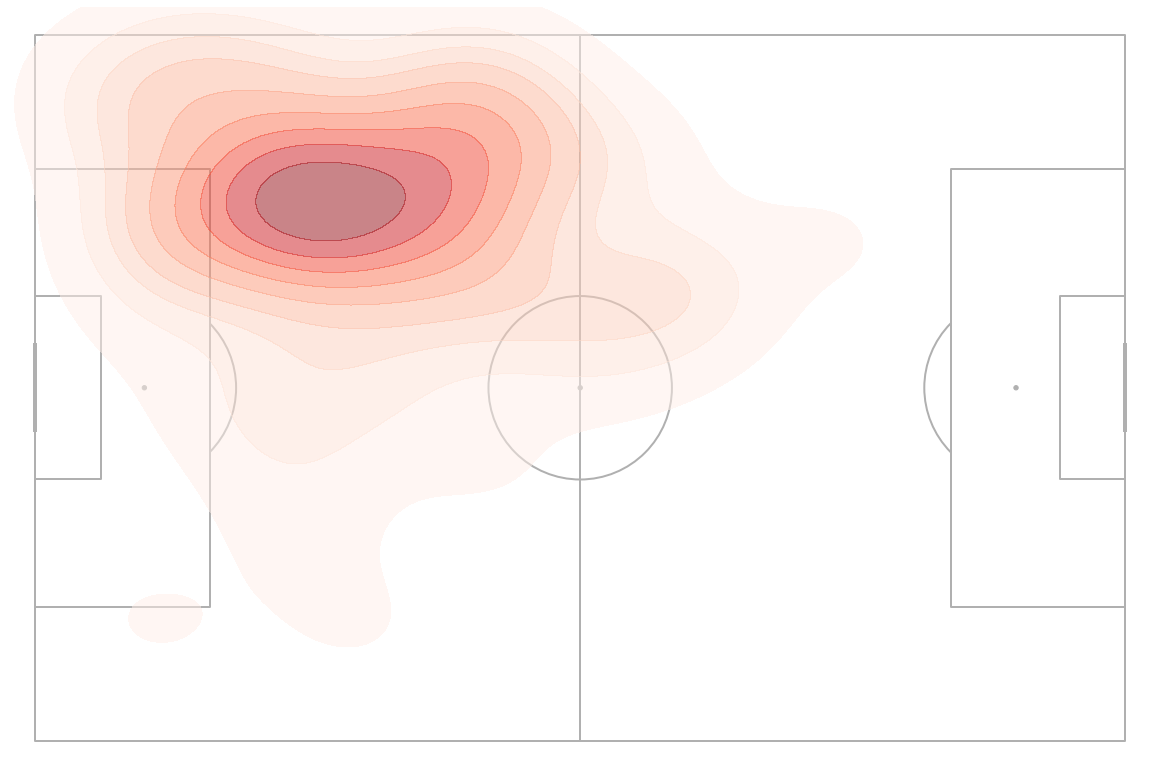

In [68]:
# Use seaborn to plot a heatmap
pitch = Pitch(pitch_type='wyscout')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
sns.kdeplot(x=df['X'], y=df['Y'], ax=ax, fill=True, cmap='Reds', alpha=.5)

plt.show()

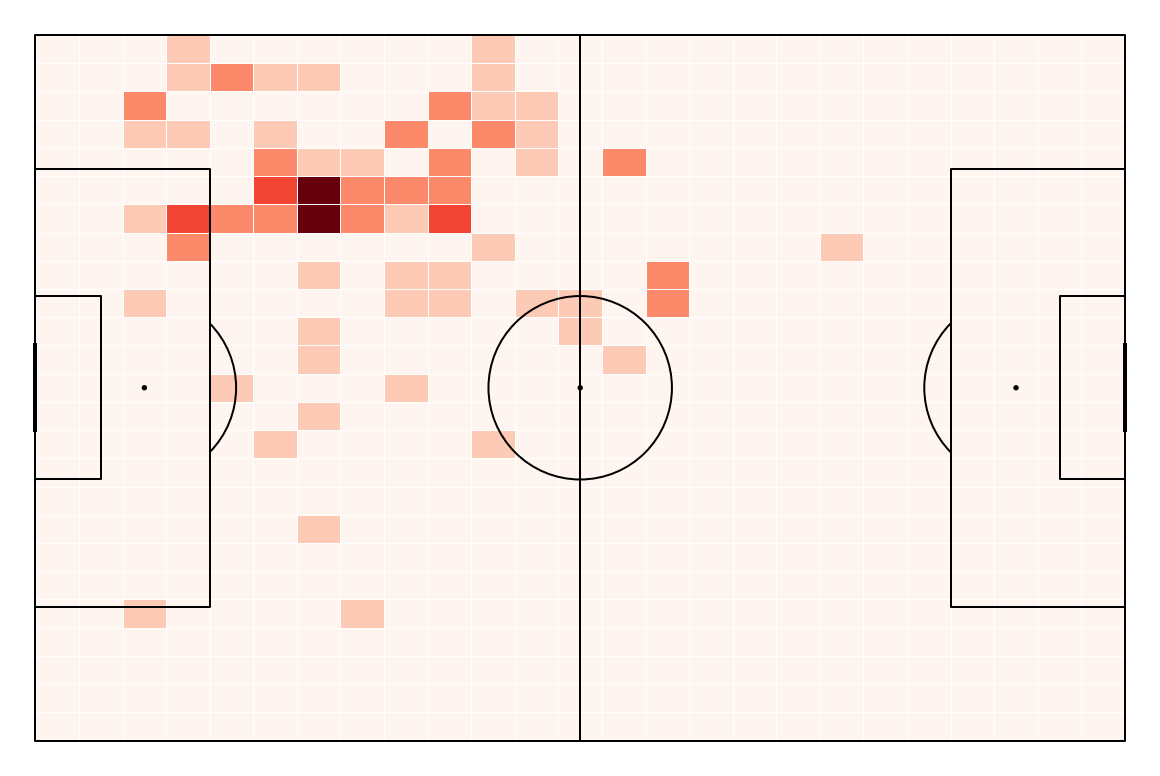

In [70]:
# Plot a different heatmap type
pitch = Pitch(pitch_type='wyscout', line_zorder=2,
              pitch_color='#ffffff', line_color='#000000')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
stats = pitch.bin_statistic(df['X'], df['Y'], statistic='count', bins=(25,25))
pitch.heatmap(stats, edgecolors='#ffffff', cmap='Reds', ax=ax)

plt.show()